<a href="https://colab.research.google.com/github/sonhs99/MachineLearning/blob/master/Assignment02/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment02
---
1. Plotting the input data 

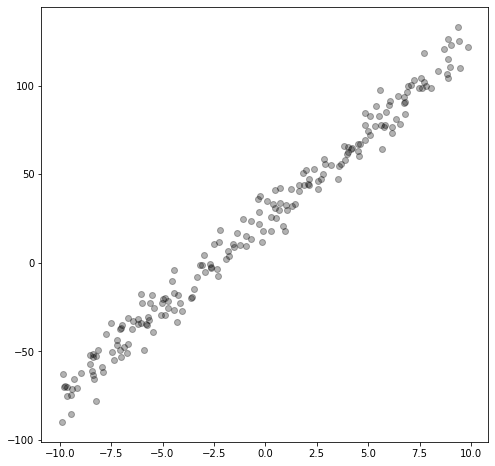

In [8]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3, color='k')
plt.show()


2.Plotting the linear regression result

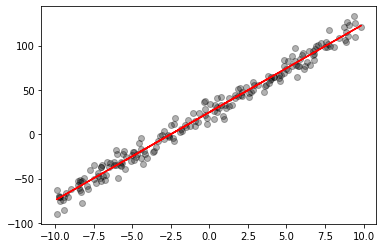

In [16]:
theta_a = [np.random.randint(1, 100)]
theta_b = [np.random.randint(1, 100)]
e_list = [0]
alpha = 0.0001

def energy(x, y, theta_a, theta_b):
  sum = 0
  for x_, y_ in zip(x, y):
    tmp = theta_a * x_ + theta_b - y_
    sum += tmp * tmp
  return sum / len(x)

e_tmp = energy(x_data, y_data, theta_a[-1], theta_b[-1])

while e_list[-1] != e_tmp:
  e_list.append(e_tmp)
  theta_a.append(theta_a[-1])
  theta_b.append(theta_b[-1])

  for x_, y_ in zip(x_data, y_data):
    theta_a[-1] -= alpha * (theta_a[-1] * x_ + theta_b[-1] - y_) * x_ / len(x_data)
    theta_b[-1] -= alpha * (theta_a[-1] * x_ + theta_b[-1] - y_) / len(x_data)

  e_tmp = energy(x_data, y_data, theta_a[-1], theta_b[-1])

plt.scatter(x_data, y_data, alpha=0.3, c='k')
plt.plot(x_data, theta_a[-1]*x_data + theta_b[-1], 'r')

plt.show()

3. Plot the energy surface

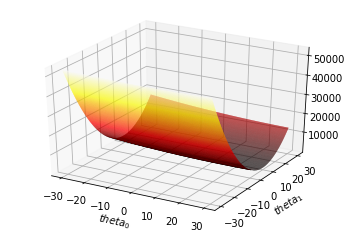

In [29]:
theta_0,theta_1 = np.meshgrid(np.linspace(-30,30,600),np.linspace(-30,30,600))

ax = plt.axes(projection='3d')

ax.plot_surface(theta_0, theta_1, energy(x_data, y_data, theta_1, theta_0),rstride=1,cstride=1,cmap='hot')
ax.set_xlabel(r'$theta_0$')
ax.set_ylabel(r'$theta_1$')
plt.show()